## Relatório de Análise VII

### Criando Agrupamento de Dados:

In [1]:
import pandas as pd


In [2]:
dados = pd.read_csv('aluguel.csv', sep=';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.3,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.7,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.0,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.4,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.7,Apartamento
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.0,Apartamento
6,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0,17.6,Apartamento
7,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.4,Apartamento
8,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,17.3,Apartamento
9,Apartamento,Olaria,3,1,0,68,1000.0,670.0,0.0,14.7,Apartamento


Resgatando média geral dos dados da coluna valor:

Faremos a análise de algumas estatísticas descritivas. Coletaremos a variável Valor e usaremos a função mean() para obter a média dos valores.

In [3]:
dados['Valor'].mean()

3465.4761976802824

### Selecionando a média segundo bairro:

Nosso próximo passo agora é não apenas coletar a média geral, mas sim a média segundo alguns tipos de variáveis:

In [4]:
bairros = dados['Bairro'].unique() #Pega todos os bairros
# bairros = bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca'] #Pega alguns bairros
bairros

array(['Centro', 'Higienópolis', 'Cachambi', 'Grajaú',
       'Lins de Vasconcelos', 'Copacabana', 'Freguesia (Jacarepaguá)',
       'Barra da Tijuca', 'Tijuca', 'Olaria', 'Ipanema', 'Botafogo',
       'Recreio dos Bandeirantes', 'Leblon', 'Jardim Oceânico', 'Humaitá',
       'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'Jardim Botânico', 'Vila Valqueire', 'Gávea', 'Cosme Velho',
       'Bonsucesso', 'Todos os Santos', 'Laranjeiras', 'Itanhangá',
       'Catete', 'Jardim Carioca', 'Praça Seca', 'Vila Isabel', 'Lagoa',
       'Taquara', 'Engenho Novo', 'Campo Grande', 'Flamengo',
       'Engenho de Dentro', 'Pilares', 'Água Santa', 'São Cristóvão',
       'Ilha do Governador', 'Vila da Penha', 'Anil', 'Vaz Lobo',
       'Madureira', 'São Francisco Xavier', 'Pechincha', 'Leme', 'Irajá',
       'Urca', 'Penha', 'São Conrado', 'Rio Comprido', 'Andaraí',
       'Quintino Bocaiúva', 'Inhaúma', 'Glória', 'Marechal Hermes',
       'Curicica', 'Moneró', 'Santa Teresa', 'Camorim'

In [5]:
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.3,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.7,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.0,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.4,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.7,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19829,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.0,Apartamento
19830,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.1,Apartamento
19831,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.8,Apartamento
19832,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.2,Apartamento


In [6]:
dados['Bairro'].drop_duplicates()


0                     Centro
1               Higienópolis
2                   Cachambi
3                     Grajaú
4        Lins de Vasconcelos
                ...         
17153        Parque Anchieta
17195         Senador Camará
18236             Cachamorra
18513           Rio da Prata
18852           Vila Militar
Name: Bairro, Length: 151, dtype: object

Dessa maneira, apenas os dados selecionados estarão em nossa listagem. Em seguida, criaremos nossos primeiros grupos com base dos bairros selecionados. atribuiremos esse conteúdo à variável 'grupo_bairro':

In [7]:
grupo_bairro = dados.groupby('Bairro')
grupo_bairro

Deescobriremos por meio do método type() que essa variável é do tipo 'DataFrameGroupBy'. Temos uma propriedade chamada groups, que consiste em um dicionário em que a chave é variável utilizada como indexador e os índices em que os registros de bairro foram encontrados. Dessa forma, é criada uma indexação do nosso DataFrame para facilitar consultas e criação de tabelas.

Laço exibindo os bairros:

In [8]:
for bairro, data in grupo_bairro:
    print(bairro)
    # print(type(data))

Abolição
Alto da Boa Vista
Anchieta
Andaraí
Anil
Arpoador
Bancários
Bangu
Barra da Tijuca
Barra de Guaratiba
Benfica
Bento Ribeiro
Bonsucesso
Botafogo
Braz de Pina
Cachambi
Cachamorra
Cacuia
Caju
Camorim
Campinho
Campo Grande
Cascadura
Catete
Catumbi
Cavalcanti
Centro
Cidade Nova
Cocotá
Coelho Neto
Colégio
Copacabana
Cordovil
Cosme Velho
Cosmos
Curicica
Del Castilho
Encantado
Engenho Novo
Engenho da Rainha
Engenho de Dentro
Estácio
Flamengo
Freguesia (Ilha do Governador)
Freguesia (Jacarepaguá)
Fátima
Gamboa
Gardênia Azul
Glória
Grajaú
Guadalupe
Guaratiba
Gávea
Higienópolis
Honório Gurgel
Humaitá
Icaraí
Ilha do Governador
Inhaúma
Inhoaíba
Ipanema
Irajá
Itanhangá
Jabour
Jacarepaguá
Jacaré
Jardim América
Jardim Botânico
Jardim Carioca
Jardim Guanabara
Jardim Oceânico
Jardim Sulacap
Joá
Lagoa
Lapa
Laranjeiras
Largo do Machado
Leblon
Leme
Lins de Vasconcelos
Madureira
Magalhães Bastos
Maracanã
Marechal Hermes
Maria da Graça
Moneró
Méier
Olaria
Oswaldo Cruz
Paciência
Padre Miguel
Paquetá
Pa

Quando analisamos os dados por meio do método type(), verificaremos que temos um DataFrame para cada bairro. Agora extrairemos o valor médio com base em nossa lista de bairros:

In [9]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Abolição -> 1195.3333333333333
Alto da Boa Vista -> 3966.6666666666665
Anchieta -> 875.0
Andaraí -> 1464.7113402061855
Anil -> 2048.8732394366198
Arpoador -> 6742.857142857143
Bancários -> 1825.0
Bangu -> 1016.0
Barra da Tijuca -> 5500.497783032811
Barra de Guaratiba -> 5550.0
Benfica -> 996.0
Bento Ribeiro -> 1030.8695652173913
Bonsucesso -> 1225.9322033898304
Botafogo -> 3375.4605418138985
Braz de Pina -> 1115.0
Cachambi -> 1157.1742424242425
Cachamorra -> 3000.0
Cacuia -> 916.6666666666666
Caju -> 850.0
Camorim -> 1735.2272727272727
Campinho -> 1037.3333333333333
Campo Grande -> 1267.71714922049
Cascadura -> 948.7096774193549
Catete -> 2253.0188679245284
Catumbi -> 1112.5
Cavalcanti -> 595.0
Centro -> 1242.3391812865498
Cidade Nova -> 1471.4285714285713
Cocotá -> 1883.3333333333333
Coelho Neto -> 700.0
Colégio -> 885.0
Copacabana -> 3351.519427402863
Cordovil -> 905.5555555555555
Cosme Velho -> 5021.666666666667
Cosmos -> 658.3333333333334
Curicica -> 1514.5657894736842
Del Castilho

Teremos como resultado a média para cada bairro. Podemos, inclusive, fazer operações mais simples como coletar a média de Valor. Basta escrever apenas:

In [10]:
grupo_bairro['Valor'].mean()

Bairro
Abolição             1195.333333
Alto da Boa Vista    3966.666667
Anchieta              875.000000
Andaraí              1464.711340
Anil                 2048.873239
                        ...     
Vila Valqueire       1769.583333
Vila da Penha        1260.576923
Vista Alegre         1114.375000
Zumbi                2150.000000
Água Santa            861.111111
Name: Valor, Length: 151, dtype: float64

Podemos passar mais de uma variável neste espaço, como Valor e Condominio, e utilizar o método round() para arredondar os valores:

In [11]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


### Exercício:

In [12]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])
alunos

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


In [13]:
#Agrupar segundo a coluna 'Sexo':
sexo = alunos.groupby('Sexo')

# transformar esse grupo em um dataframe onde a coluna 'Notas' será a media das notas por sexo, arredondadas em 2 casas decimais:
sexo = pd.DataFrame(sexo['Notas'].mean().round(2))

#Renomear a coluna 'Notas' para 'Notas Médias':
sexo.columns = ['Notas Médias']

sexo

,Notas Médias
Sexo,
F,5.82
M,7.12


## Estatisticas Descritivas:

Chamaremos 'grupo_bairro', a variável 'Valor', e em seguida acionaremos o 'describe()'. E para arredondar os valores obtidos também usaremos o round(2).

Teremos como resultado um DataFrame com as colunas:

- count: Frequência;


- mean: Média;


- std: desvio padrão;


- min: valor minímo;


- max: valor máximo;


- 25%: primeiro quartio;


- 50%: mediana;


- 75%: o terceiro quartio;


In [14]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


Rapidamente perceberemos alguns porblemas: o desvio padrão (std) apresenta uma variação muito grande no caso de 'Botafogo', o mesmo ocorre para 'Barra da Tijuca'. 

No caso de valor máximo, perceberemos valores estranhos também;

Segundo a tabela, existem imóveis disponíveis em 'Botafogo' com a locação no valor de 4.500.000,00;


Essas informações estão errôneas, muito provavelmente esses valores correspondem à venda e não à locação. Para solucionar essa questão. Coletaremos a variàvel 'Valor', e em seguida utilizaremos o método 'aggregate()' que receberá como parâmetro o conjunto de estatísticas que nos interessam:

In [15]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Abolição,800.0,2300.0,17930.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,700.0,1000.0,3500.0
Andaraí,700.0,2950.0,142077.0
Anil,300.0,7000.0,145470.0
...,...,...,...
Vila Valqueire,800.0,16000.0,84940.0
Vila da Penha,450.0,4500.0,131100.0
Vista Alegre,700.0,1400.0,17830.0


Modificando as nomenclatiras das colunas 'min' e 'max' via 'rename()':

In [16]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns={'min':'Mínimo', 'max':'Máximo'})


,Mínimo,Máximo,sum
Bairro,,,
Abolição,800.0,2300.0,17930.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,700.0,1000.0,3500.0
Andaraí,700.0,2950.0,142077.0
Anil,300.0,7000.0,145470.0
...,...,...,...
Vila Valqueire,800.0,16000.0,84940.0
Vila da Penha,450.0,4500.0,131100.0
Vista Alegre,700.0,1400.0,17830.0


Conseguimos visualizar os problemas de ultra variação em alguns pontos do DataFrame porque temos poucas informações, mas caso tenhamos uma quantidade imensa de dados será difícil identificar falhas manualmente.

Utilizaremos um pacote do Python, conecido por 'Mathplot Lib', criado para gerar visualizações gráficas.

Primeiramente, importamos e configuramos o tamanho da representação visual via 'figsize()':

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Construiremos nosso primeiro plot com grupo_bairro, e atribuiremos essa representação à variável fig.

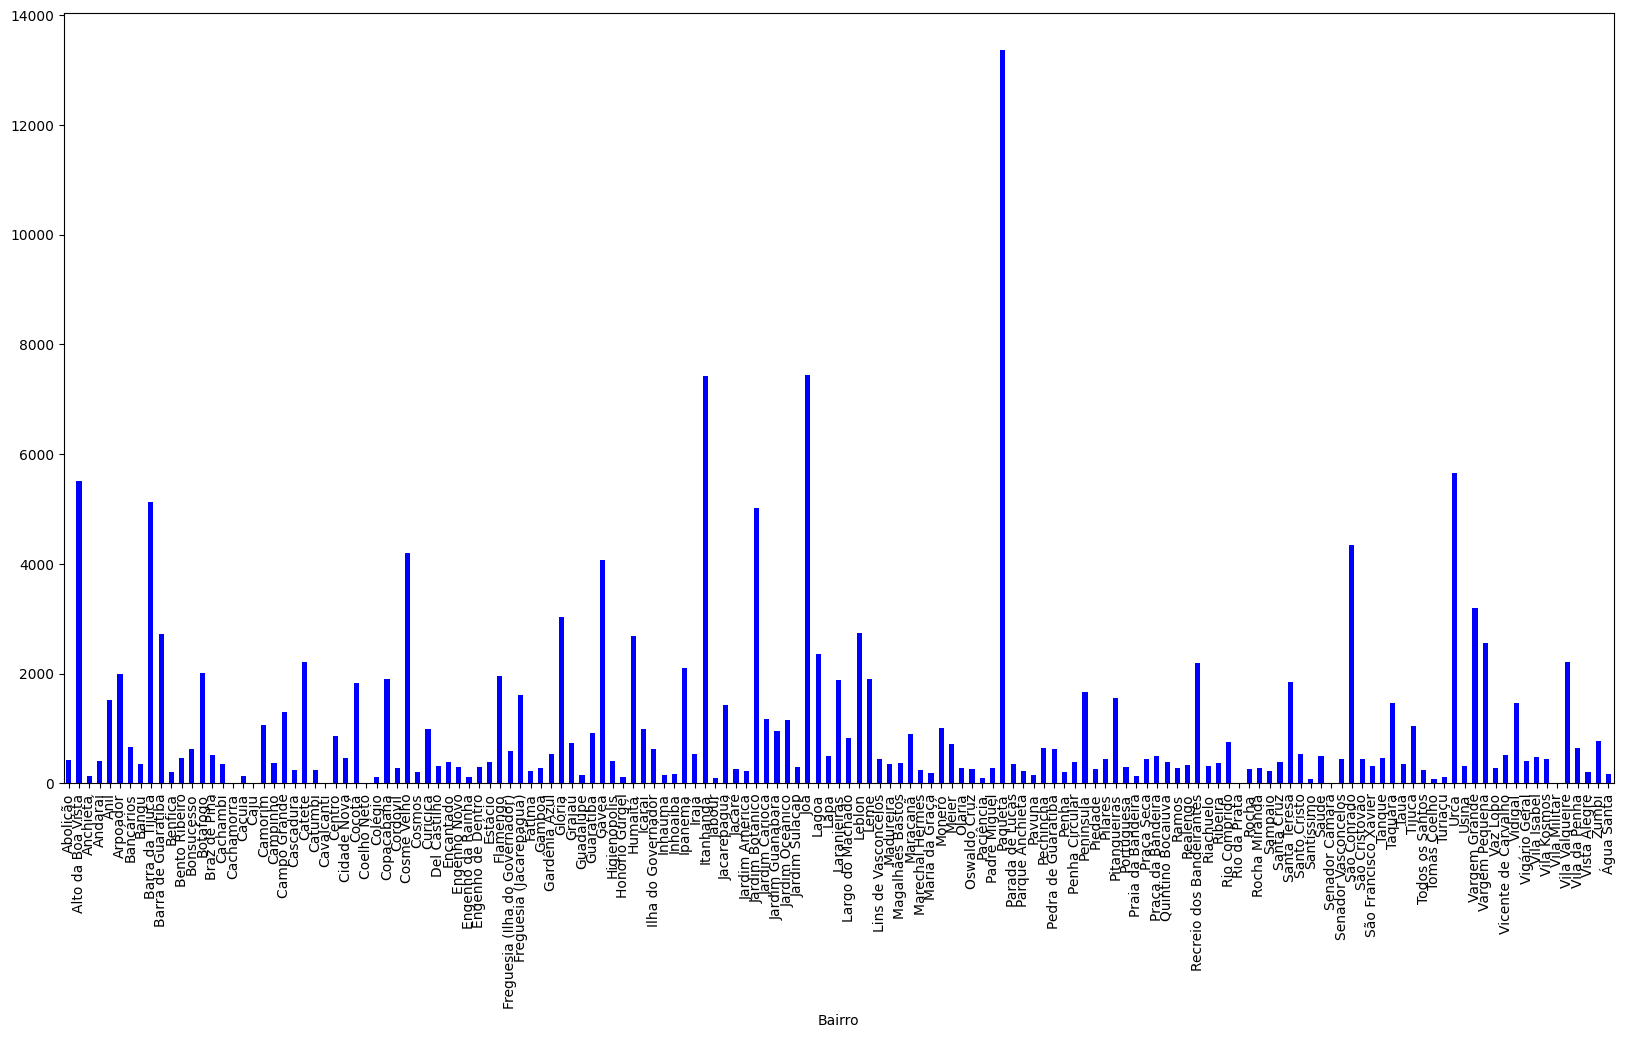

In [18]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')

Teremos um gráfico em barra, em que podemos identificar a variação atípica no bairro "Botafogo". 

Com o gráfico temos uma pista de onde devemos fazer ajustes no banco de dados. Faremos algumas configurações em nosso gráfico: 

Coletaremos a média mean() e utilizaremos o set_ylabel() para nomear o eixo Y de Valor do Aluguel. 

Por fim, daremos o título fig.set_title() de Valor Médio do Aluguel Por Bairro. Como configuração adicional, aumentaremos as fontes do gráfico via fontsize.

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

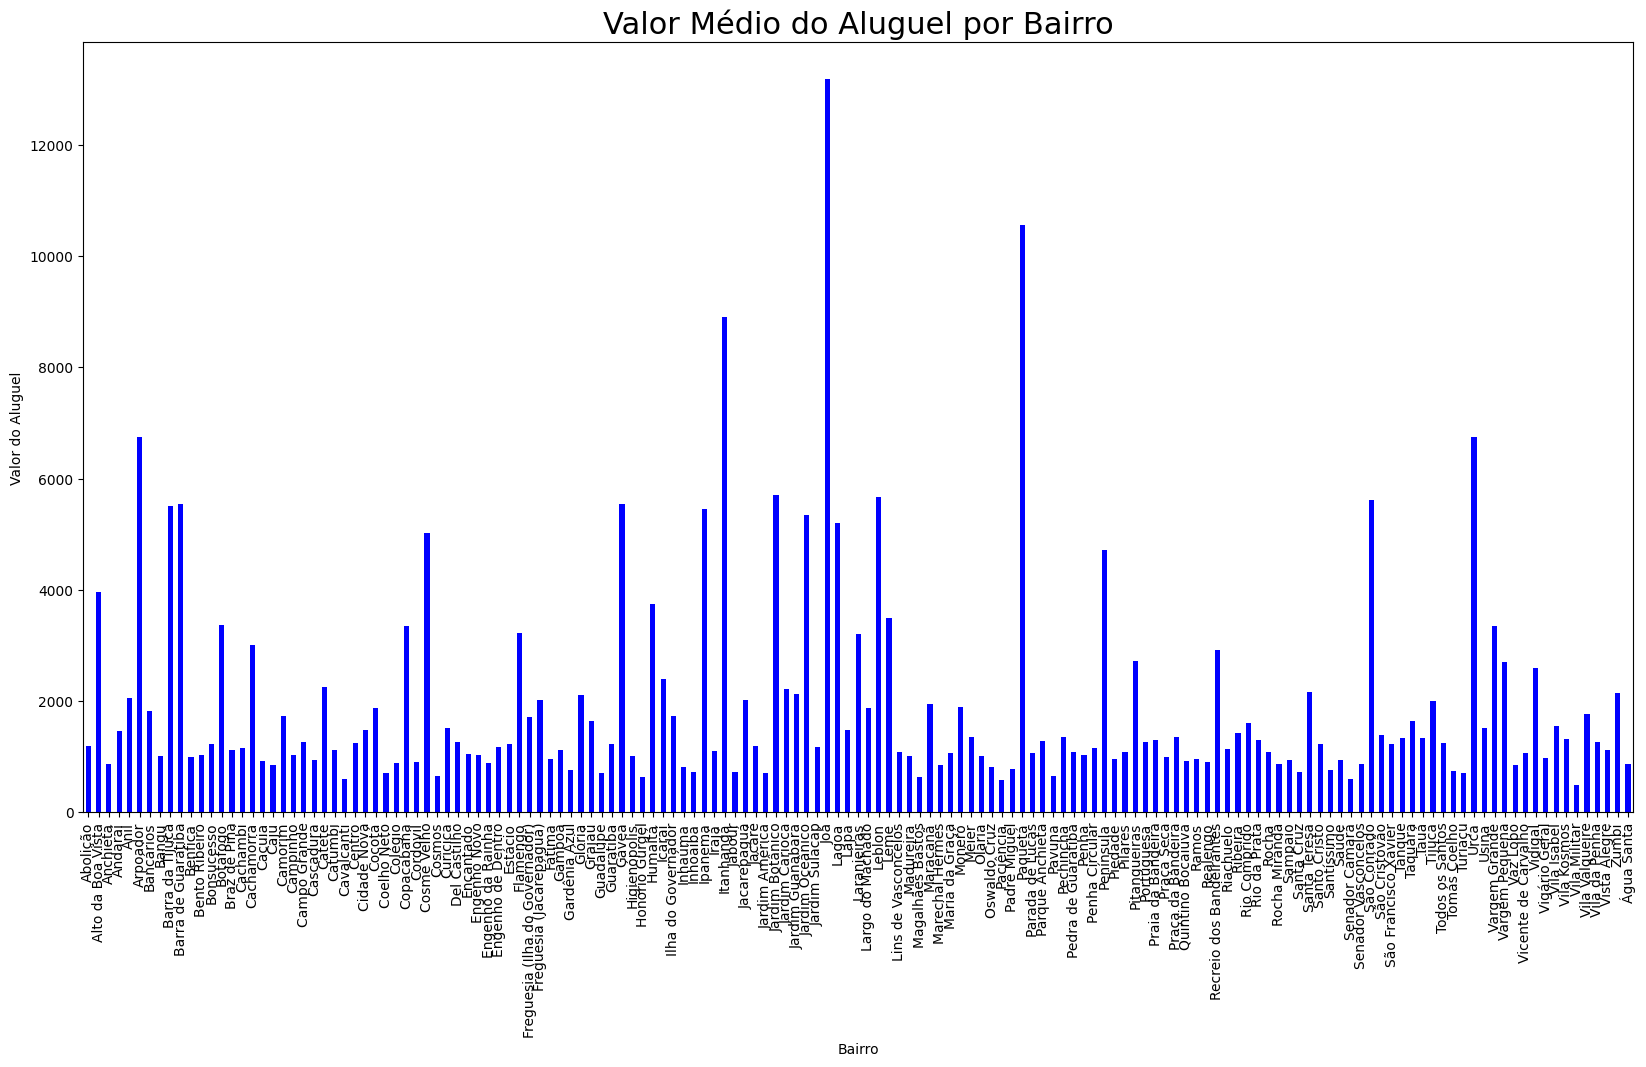

In [19]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

## Exercícios:

In [20]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [21]:
produtos = precos.groupby('Produto', sort = False)
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2

In [22]:
estatisticas = ['mean', 'std', 'min', 'max']
nomes = {'mean': 'Média', 'std': 'Desvio Padrão', 
    'min': 'Mínimo', 'max': 'Máximo'}
produtos['Preço'].aggregate(estatisticas).rename(columns = nomes).round(2)

,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Cebola,2.06,0.41,1.69,2.5
Tomate,3.43,0.52,2.99,4.0
Batata,3.96,0.26,3.69,4.2


O método aggregate() permite selecionar um conjunto de estatísticas personalizado. É possível declarar o método de forma simplificada, utilizando agg(), conforme exemplo abaixo:

In [23]:
produtos['Preço'].agg(['mean', 'std']).round(2)

,mean,std
Produto,,
Cebola,2.06,0.41
Tomate,3.43,0.52
Batata,3.96,0.26
